In [1]:
import torch
import torchvision
import numpy as np
import os

In [2]:
# Define the base directory where your .npy files are located
base_data_path = "/home/alex/data/CIFAR-100-C"

# --- Step 1: List all .npy files in the directory ---
print(f"Listing .npy files in: {base_data_path}")
npy_files = [f for f in os.listdir(base_data_path) if f.endswith('.npy')]
print(npy_files)

npy_files_location = {file: os.path.join(base_data_path, file) for file in npy_files}

Listing .npy files in: /home/alex/data/CIFAR-100-C
['speckle_noise.npy', 'spatter.npy', 'elastic_transform.npy', 'frost.npy', 'defocus_blur.npy', 'saturate.npy', 'gaussian_noise.npy', 'glass_blur.npy', 'jpeg_compression.npy', 'labels.npy', 'motion_blur.npy', 'shot_noise.npy', 'fog.npy', 'brightness.npy', 'pixelate.npy', 'gaussian_blur.npy', 'zoom_blur.npy', 'contrast.npy', 'impulse_noise.npy', 'snow.npy']


In [38]:
file_to_explore = npy_files_location.get("spatter.npy")
image_num = 234

data = np.load(file_to_explore)

print(f"Data type: {type(data)}")
print(f"Shape: {data.shape}")
print(f"Data type of elements: {data.dtype}")
print(f"Number of dimensions: {data.ndim}")
print(f"Total number of elements: {data.size}")

Data type: <class 'numpy.ndarray'>
Shape: (50000, 32, 32, 3)
Data type of elements: uint8
Number of dimensions: 4
Total number of elements: 153600000


In [39]:
labels = np.load(npy_files_location.get("labels.npy"))
labels.shape

(50000,)

In [40]:
data[0:10000].shape

(10000, 32, 32, 3)

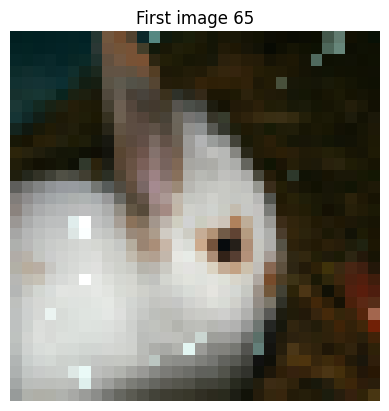

In [41]:
 # You can visualize an image if matplotlib is available
try:
    import matplotlib.pyplot as plt
    # Assuming (N, H, W, C) format. If (N, C, H, W), you'll need to transpose:
    # `plt.imshow(data[0].transpose(1, 2, 0))`
    if data.shape[-1] == 3: # If last dim is channels
        plt.imshow(data[image_num]) # Display the first image
    elif data.shape[1] == 3: # If second dim is channels
         plt.imshow(data[image_num].transpose(1, 2, 0))
    plt.title(f"First image {labels[image_num]}")
    
    plt.axis('off')
    plt.show()
except ImportError:
    print("Matplotlib not installed. Cannot display images.")

In [42]:
data[0].shape

(32, 32, 3)

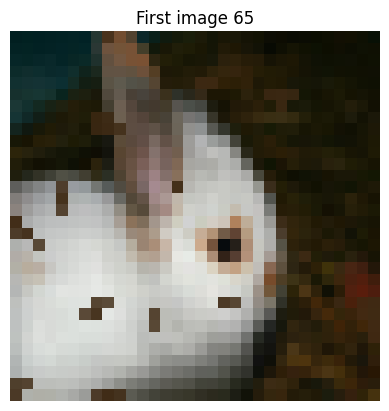

In [43]:
 # You can visualize an image if matplotlib is available
try:
    import matplotlib.pyplot as plt
    # Assuming (N, H, W, C) format. If (N, C, H, W), you'll need to transpose:
    # `plt.imshow(data[0].transpose(1, 2, 0))`
    if data.shape[-1] == 3: # If last dim is channels
        plt.imshow(data[image_num-20000]) # Display the first image
    elif data.shape[1] == 3: # If second dim is channels
         plt.imshow(data[image_num-20000].transpose(1, 2, 0))
    plt.title(f"First image {labels[image_num]}")
    
    plt.axis('off')
    plt.show()
except ImportError:
    print("Matplotlib not installed. Cannot display images.")

In [25]:
cifar100_train = torchvision.datasets.CIFAR100(
    root="/home/alex/data/",
    download=True,
    train=True
)

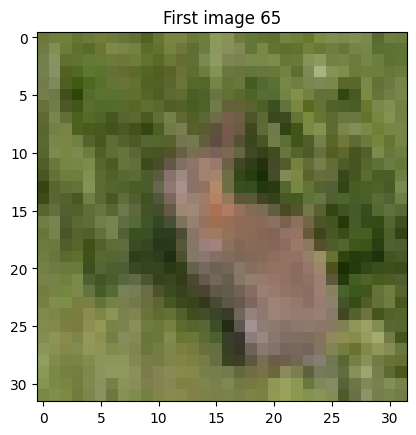

In [44]:
for idx in range(len(cifar100_train)):
    if cifar100_train[idx][1] == labels[image_num]:
        plt.imshow(cifar100_train[idx][0])
        plt.title(f"First image {cifar100_train[idx][1]}")

# try:
#     import matplotlib.pyplot as plt
#     # Assuming (N, H, W, C) format. If (N, C, H, W), you'll need to transpose:
#     # `plt.imshow(data[0].transpose(1, 2, 0))`
#     if cifar100_train[0].shape[-1] == 3: # If last dim is channels
#         plt.imshow(cifar100_train[0]) # Display the first image
#     elif cifar100_train.shape[1] == 3: # If second dim is channels
#          plt.imshow(cifar100_train[0].transpose(1, 2, 0))
#     plt.title(f"First image {cifar100_train[0][1]}")
    
#     plt.axis('off')
#     plt.show()
# except ImportError:
#     print("Matplotlib not installed. Cannot display images.")

In [14]:
######################## Tiny Imagenet ########################

In [9]:
base_data_path = "/home/alex/data/Tiny-ImageNet-C"
corruption_type = "fog"
corruption_level = "1"

corruption_data_path = os.path.join(base_data_path, corruption_type)
full_corruption_data_path = os.path.join(corruption_data_path, corruption_level)
dataset = torchvision.datasets.ImageFolder(root=full_corruption_data_path)

In [10]:
path = "/home/alex/data/tiny-imagenet-200/tiny-imagenet-200/train"
old_dataset = torchvision.datasets.ImageFolder(root=path)
old_dataset[500]

(<PIL.Image.Image image mode=RGB size=64x64>, 1)

In [11]:
data = dataset[500] 
data

(<PIL.Image.Image image mode=RGB size=64x64>, 10)

Type of first_image: <class 'PIL.Image.Image'>
Label of first_image: 10


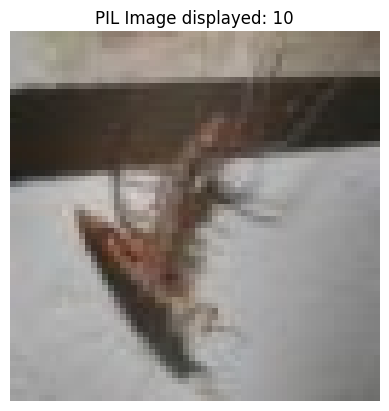

In [12]:
first_image, first_label = dataset[500] 

print(f"Type of first_image: {type(first_image)}")
print(f"Label of first_image: {first_label}")
img_array = np.array(first_image)

plt.imshow(img_array)
plt.title(f"PIL Image displayed: {first_label}")
plt.axis('off') # Turn off axis labels and ticks
plt.show()

Type of first_image: <class 'PIL.Image.Image'>
Label of first_image: 0


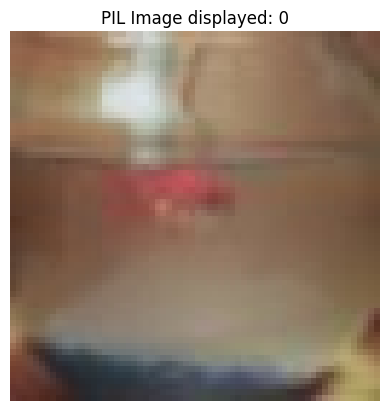

In [13]:
first_image, first_label = dataset[2]

print(f"Type of first_image: {type(first_image)}")
print(f"Label of first_image: {first_label}")
img_array = np.array(first_image)

plt.imshow(img_array)
plt.title(f"PIL Image displayed: {first_label}")
plt.axis('off') # Turn off axis labels and ticks
plt.show()